<a href="https://colab.research.google.com/github/wvirany/mini_projects/blob/main/overparametrized_methods/overparametrized_polynomials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample

rng = np.random.RandomState(42)

In [145]:
noise_std = 2
num_samples = 12

f = lambda x: 3 * x + 12 + rng.normal(loc=0, scale=noise_std, size=x.shape)

In [157]:
X = np.arange(12, step=1).reshape(-1, 1)
y = f(X).reshape(-1)

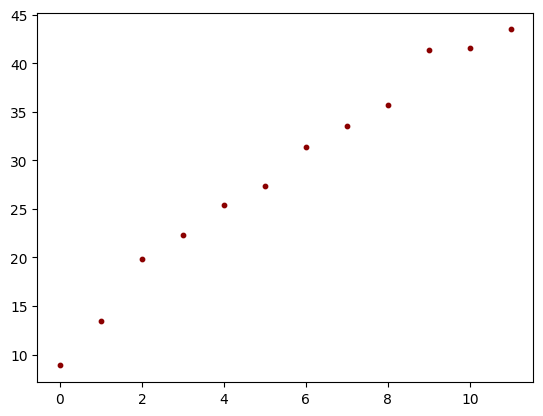

In [158]:
plt.scatter(X, y, c='darkred', s=10);

In [159]:
deg = 12

poly = PolynomialFeatures(degree=deg, include_bias=False)
poly_features = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(poly_features, y);

In [160]:
x_seq = np.arange(num_samples, step=.1)
poly_seq = np.zeros(x_seq.size)

In [161]:
for i in range(deg):
  poly_seq += poly_model.coef_[i] * x_seq**(i+1)

poly_seq += poly_model.intercept_

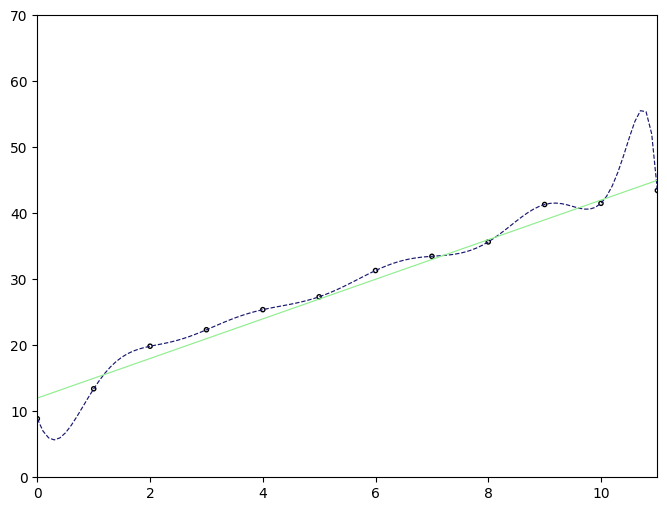

In [162]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(X, y, marker='.', fc='none', ec='black')
ax.plot(x_seq, poly_seq, ls='dashed', c='midnightblue', lw=.85)
ax.plot(X, 3*X + 12, ls='solid', c='lightgreen', lw=.85)
ax.set_xlim(0, 11)
ax.set_ylim(0, 70);

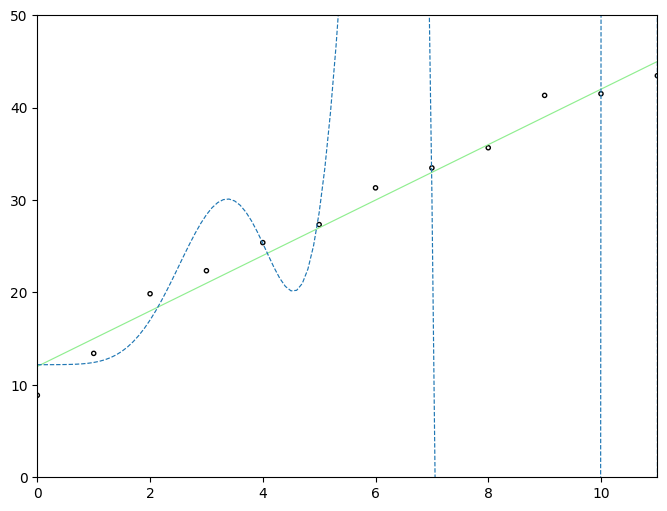

In [164]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, y, marker='.', fc='none', ec='black')
ax.plot(X, 3*X + 12, ls='solid', c='lightgreen', lw=.85)
ax.set_xlim(0, 11)
ax.set_ylim(0, 50);

x_seq = np.arange(12, step=.1)
poly_seq = np.zeros(x_seq.size)

n = 1

for i in range(n):

  X_bootstrap = resample(X, random_state=rng).reshape(-1, 1)
  y_bootstrap = f(X_bootstrap).reshape(-1)

  deg = 12

  poly = PolynomialFeatures(degree=deg, include_bias=False)
  poly_features = poly.fit_transform(X_bootstrap)

  poly_model = LinearRegression()
  poly_model.fit(poly_features, y_bootstrap);


  poly_seq_boostrap = np.zeros(x_seq.size)

  for j in range(deg):
    poly_seq_boostrap += poly_model.coef_[j] * x_seq**(j+1)

  poly_seq_boostrap += poly_model.intercept_

  poly_seq += poly_seq_boostrap / n

ax.plot(x_seq, poly_seq, ls='dashed', lw=.85)

### Discussion:

The purpose of this notebook was to investigate the idea that interpolating classifiers perform well when averaged together. Evidently, this was not the case. However, the literature indicates that certain overparametrized methods, e.g., AdaBoost and Random Forests (see Wyner et al. 2017), which interpolate the data are robust to noise.